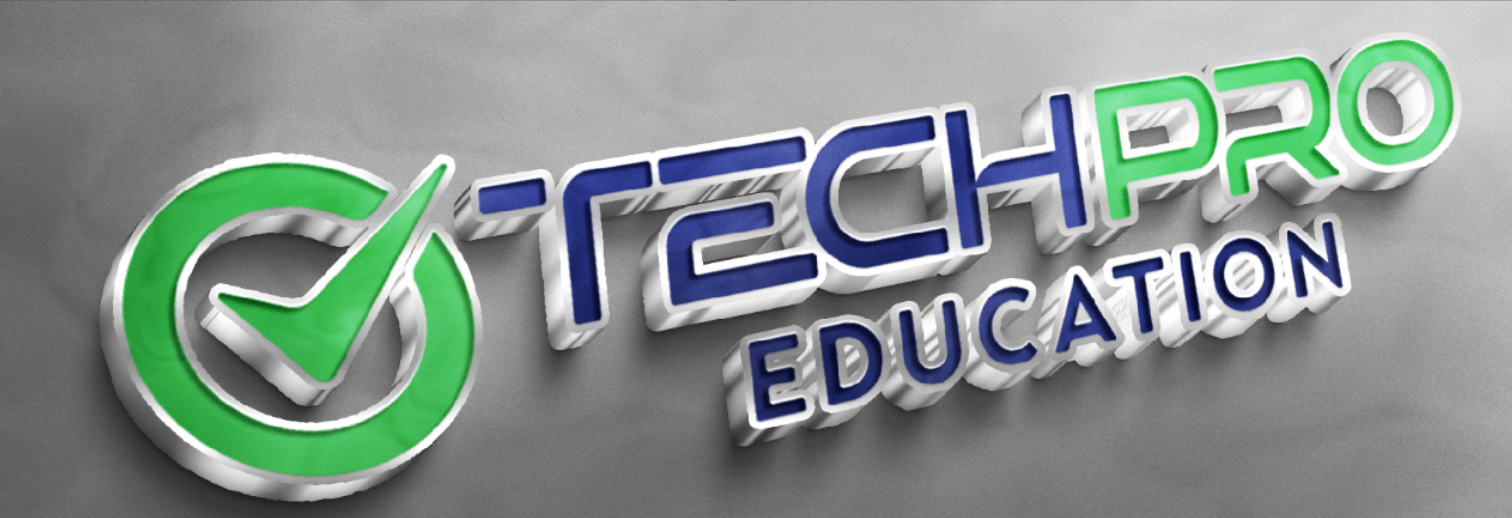

# PCA - TEMEL BİLEŞEN ANALİZİ  (Principal Component Analysis)

Teorik Anlatım Örneği

- PCA : karmaşıklık azaltma tekniğidir
- Ridge gibi davranır. (Feature ları dışlamdan hareket eder)
- PCA = Feature Extraction  (Lasso:Feature Selection)
- Varyansın açoklanma oranına dayanır (%80 eşik değer)
- PCA, bilgiyi konsantre hale getirir
- Hem Supervise da hem UNsuoervise da kullanılır
- Bileşenler arasında multicoliinearity sıfırdır
- Scale yapmak gereklidir

- 20 kg Nar yemek mi yoksa bunun 2 litre nar suyunu içmek mi ? 
- çok fazla feature ile çalışmanın dezavantajları
- Çiçek demeti örneği

## Clustering with PCA  
Ülkeleri Mutluluk Skorlarına Göre Kümelere Ayırma Örneği

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import scale
%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (8,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

In [2]:
df = pd.read_csv("World Happiness 2015-2019.csv")
df.head()

,Overall rank,Year,Country,Region,Score,GDP,Social_Support,Health_life_expectancy,Freedom_to_choices,Generosity,Perceptions_of_corruption
0,1,2015,Switzerland,Western Europe,7.587,1.397,1.350,0.941,0.666,0.297,0.420
1,2,2015,Iceland,Western Europe,7.561,1.302,1.402,0.948,0.629,0.436,0.141
2,3,2015,Denmark,Western Europe,7.527,1.325,1.361,0.875,0.649,0.341,0.484
3,4,2015,Norway,Western Europe,7.522,1.459,1.331,0.885,0.670,0.347,0.365
4,6,2015,Finland,Western Europe,7.406,1.290,1.318,0.889,0.642,0.234,0.414


Bu veri seti, 2015'ten 2019'a kadar olan yıllar arasında dünya çapındaki ülkelerin mutluluk seviyelerini içeriyor. İçerik olarak şu bilgileri barındırıyor:

Overall rank: Ülkenin o yılki mutluluk sıralamasını gösterir.

Year: Verinin hangi yıla ait olduğunu belirtir.

Country: Ülkenin adı.

Region: Ülkenin bulunduğu bölge.

Score: Mutluluk skoru. Bu skor, aşağıda sıralanan faktörlerin bir kombinasyonu olarak hesaplanmıştır.

GDP: Kişi başına düşen Gayri Safi Yurtiçi Hasıla.

Social Support: Sosyal destek düzeyi.

Health Life Expectancy: Sağlıklı yaşam beklentisi.

Freedom to Choices: Bireylerin kendi hayatları üzerindeki özgürlük derecesi.

Generosity: Cömertlik düzeyi.

Perceptions of Corruption: Yolsuzluk algısı.

In [3]:
# Analizde kuLlanılacak feature'ları belirten bir degisken olusturalım

features = ["GDP","Social_Support","Health_life_expectancy","Freedom_to_choices", "Generosity", "Perceptions_of_corruption"]

In [4]:
#veri tiplerini float olarak duzenleyelim

df[features] = df[features].astype("float")

In [5]:
#overaL_rank (ülkenin genel sıralaması ) degerlerini integer yapalım

df["Overall rank"] = df["Overall rank"].astype("int")

In [6]:
# Country degerlerini categoric data yapalım

df["Country"] = df["Country"].astype("category")

In [7]:
#data setindeki region kategorisi null degerler içerdiği ve kullanılmayacağı için düşürelim
df= df.drop(columns=['Region'])

In [8]:
df.dtypes

Overall rank                    int32
Year                            int64
Country                      category
Score                         float64
GDP                           float64
Social_Support                float64
Health_life_expectancy        float64
Freedom_to_choices            float64
Generosity                    float64
Perceptions_of_corruption     float64
dtype: object

In [9]:
df.isnull().sum()

Overall rank                 0
Year                         0
Country                      0
Score                        0
GDP                          0
Social_Support               0
Health_life_expectancy       0
Freedom_to_choices           0
Generosity                   0
Perceptions_of_corruption    1
dtype: int64

In [10]:
df = df.dropna(subset=['Perceptions_of_corruption'])

In [11]:
# tekrar kontrol edelim ve null deger yok

df.isnull().sum()

Overall rank                 0
Year                         0
Country                      0
Score                        0
GDP                          0
Social_Support               0
Health_life_expectancy       0
Freedom_to_choices           0
Generosity                   0
Perceptions_of_corruption    0
dtype: int64

In [12]:
# overall_rank değerlerini baz aLarok üLkeLeri 5 kategoriye ayıralım

category = pd.qcut(df["Overall rank"], 5, labels=[ "Very Top Rank","Top rank","Middle Rank","Low Rank","Very Low Rank"])

In [13]:
# df içinde bulunan ülkelerin ait oLdukları kategoriLeri class degiskenine atayalım

df["class"] = category

## Scaling

PCA uygularken özelliklerin ölçeklendirilmesi, daha dengeli ve doğru sonuçlar elde etmek için önemli bir adımdır..

Farklı ölçeklerdeki feature; temel bir bileşenin yüksek varyanslı değişkene bağımlı olmasına yol açacaktır. Bu istenmeyen bir durumdur. Bu aşamada **ortak ölçeklendirme yaparak veriyi normalleştirmek PCA için elzemdir**

In [14]:
# DeğişkenLeri scale yapalım

df_scaled = scale(df[features ])

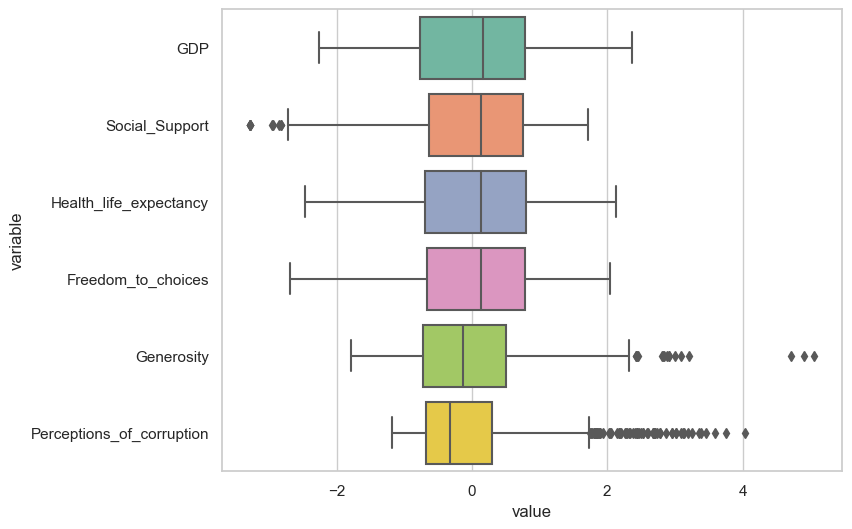

In [15]:
# Box-plot ile ülkelerin feature'lara göre dağılımı

df2 = pd.DataFrame( df_scaled, columns=features)
df2["Country"] = pd.Series ( df["Country"] , index=df.index)
df3 = pd.melt(df2, id_vars="Country", value_vars=df2[features])
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
sns.boxplot(y= "variable", x="value", data=df3, palette="Set2")
plt.show()

In [16]:
# means ve std kontrolü

df2[features].describe().loc[["count", "mean", "std"]].round()

,GDP,Social_Support,Health_life_expectancy,Freedom_to_choices,Generosity,Perceptions_of_corruption
count,781.0,781.0,781.0,781.0,781.0,781.0
mean,-0.0,-0.0,-0.0,-0.0,0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0,1.0


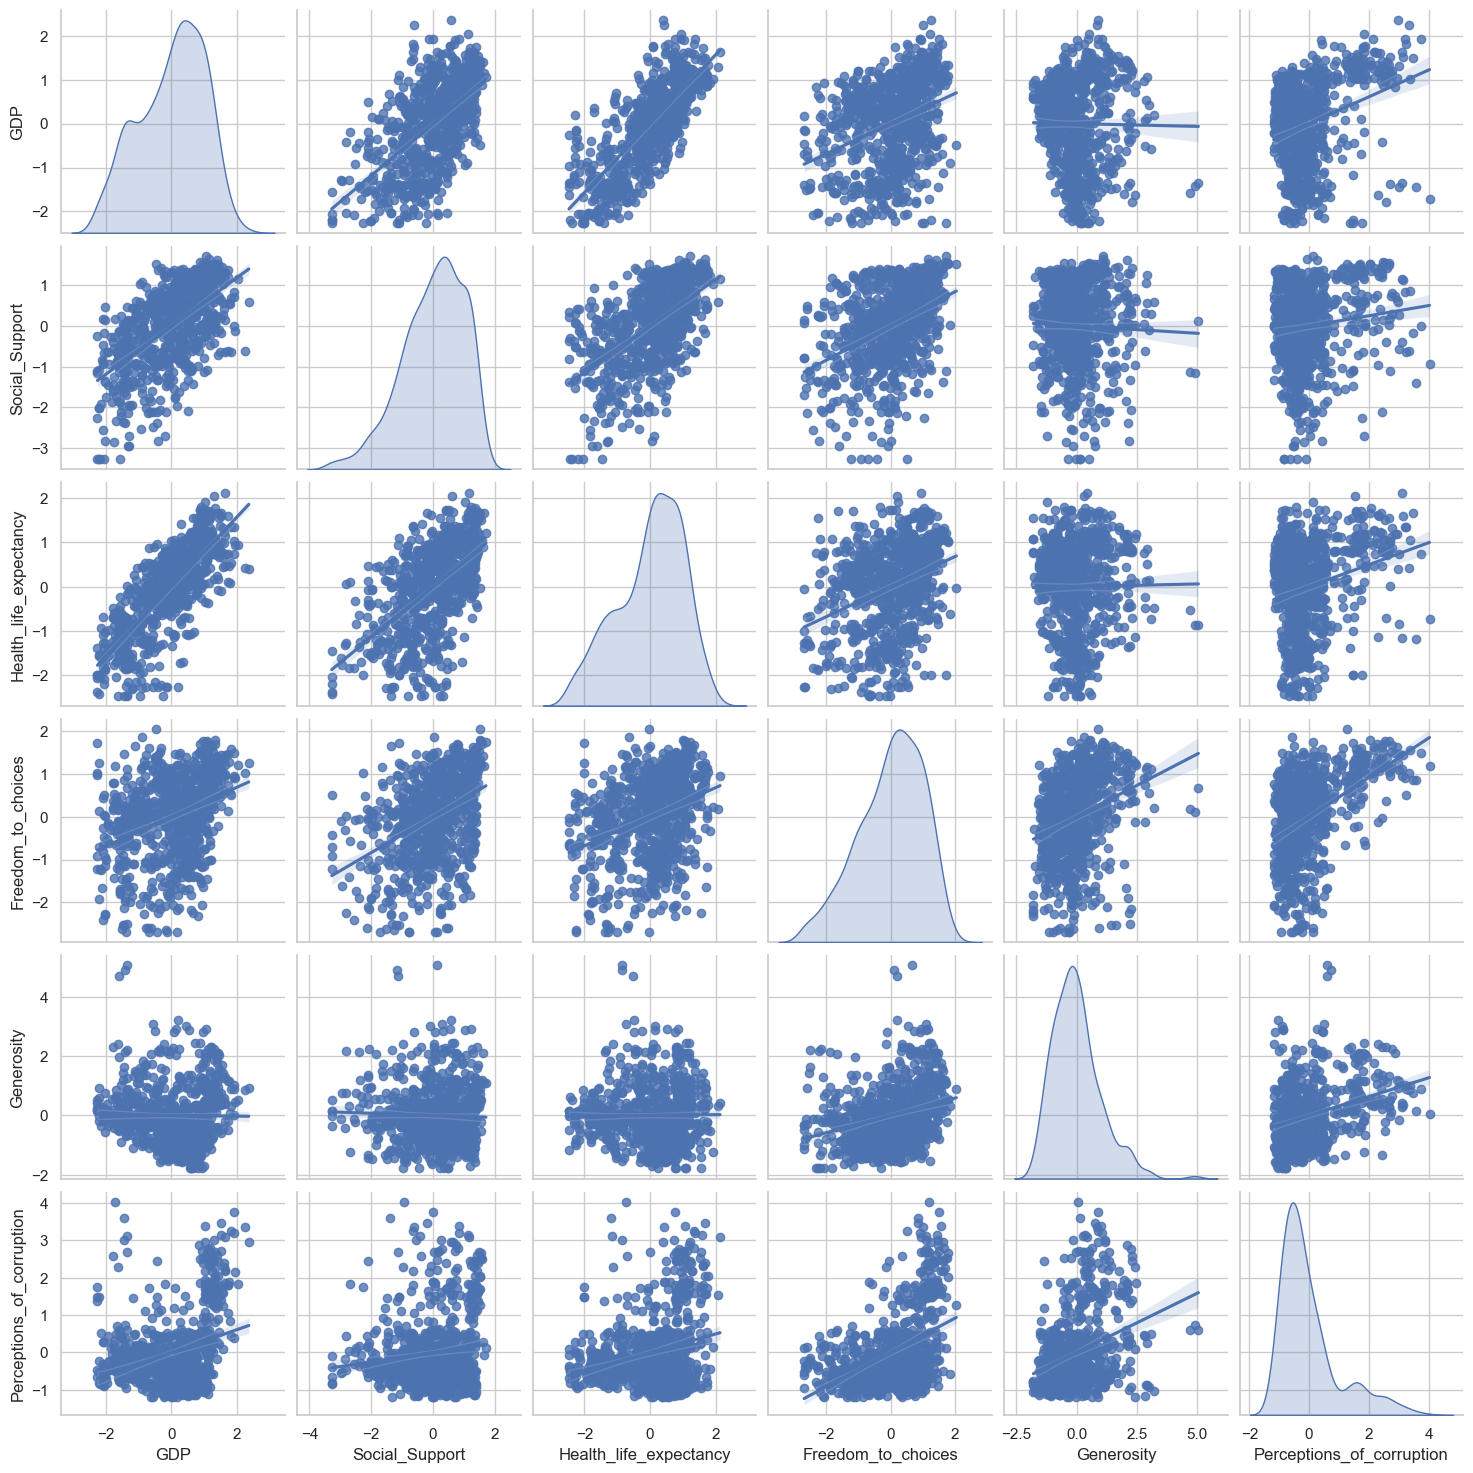

In [17]:
# feature'lar arası ilişkiyi scatter plot ile inceleme

sns.set(style="whitegrid")
sns.pairplot(df2[features], kind = "reg", diag_kind="kde")
plt.show()

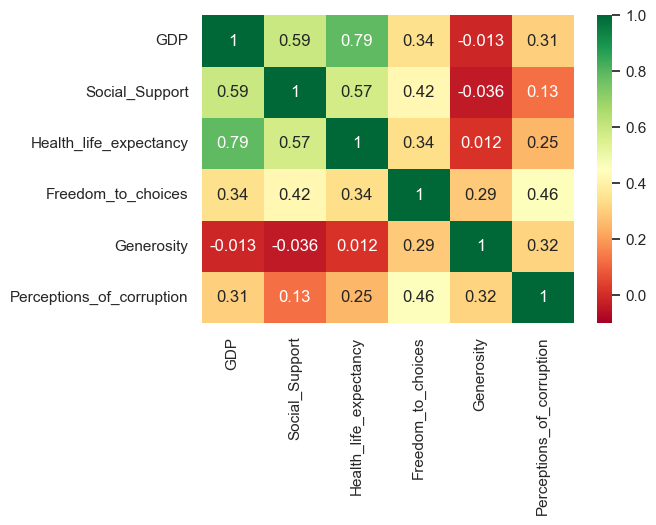

In [18]:
# degiskenler arasındaki korelasyon

plt.figure(figsize=(6,4))
sns.set(style="whitegrid")
sns.heatmap(df2[features].corr(method="pearson"), vmin=-.1, vmax=1, annot=True, cmap="RdYlGn")
plt.show()


## PCA hyperparameter

In [20]:
# pip install prince